In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from sklearn.metrics import r2_score 

In [ ]:
df_soccer = pd.read_csv("SOCCER SEASON 2018-19.csv")
df_soccer.head()

,Home_team,Score_Home_Team,Score_Away_Team,Away_team,FAVORITE,RESULTS,Home_odd,Draw_odd,Away_odd,Ball_possession_h,Ball_possession_a,Goal_attempts_h,Goal_attempts_a,Attacks_h,Attacks_a,Dangerous_attacks_h,Dangerous_attacks_a
0,Toronto FC,0,2,Columbus Crew,AWAY,AWAY,1.55,4.15,5.75,0.58,0.42,13.0,12.0,82.0,83.0,75.0,54.0
1,Houston Dynamo,4,0,Atlanta Utd,HOME,HOME,2.55,3.45,2.65,0.41,0.59,13.0,13.0,0.0,0.0,0.0,0.0
2,Philadelphia Union,2,0,New England Revolution,HOME,HOME,1.93,3.50,3.90,0.64,0.36,21.0,8.0,0.0,0.0,0.0,0.0
3,Orlando City,1,1,DC United,HOME,DRAW,2.25,3.50,3.05,0.59,0.41,12.0,14.0,116.0,77.0,77.0,63.0
4,FC Dallas,1,1,Real Salt Lake,HOME,DRAW,1.70,3.90,4.75,0.53,0.47,18.0,9.0,105.0,100.0,68.0,31.0


### Creating a column that will show if a bet is won or lost if bet is back the Favorite

In [ ]:
def new_column_win_lose_draw(row1):
    if row1['FAVORITE'] == row1['RESULTS']:
        return "Won" 
    elif row1['FAVORITE'] != row1['RESULTS'] and row1['RESULTS'] != "DRAW":
        return "Lost"
    else:
        return "Draw"
    
df_soccer["WON_LOST_Back"] = df_soccer.apply(new_column_win_lose_draw, axis=1)

#### Creating a column to show the odds of the favorite team, weather they are playing HOME or AWAY given by the data colection


In [ ]:
def new_column_FAV_odd(row2):
    if row2['FAVORITE'] == "HOME":
        return row2['Home_odd']
    elif row2["FAVORITE"] == "AWAY":
        return row2['Away_odd']
                  
df_soccer['FAVORITE_odd'] = df_soccer.apply(new_column_FAV_odd, axis=1)    

#### Creating a column to show the possession of the ball of the favorite, weather they are playing HOME or AWAY


In [ ]:
def new_column_Ball_possession_Fav(row3):
    if row3['FAVORITE'] == "HOME":
        return row3['Ball_possession_h']*100 
    elif row3["FAVORITE"] == "AWAY":
        return row3['Ball_possession_a']*100
                  
df_soccer['Ball_possession_Fav'] = df_soccer.apply(new_column_Ball_possession_Fav, axis=1)  

#### Creating a column to show if the possession of the Favorite is bigger than the other team


In [ ]:
def new_column_FAV_more_possession(row4):
    if row4['FAVORITE'] == "HOME" and row4['Ball_possession_h']>=row4['Ball_possession_a']:
        return "YES"
    elif row4['FAVORITE'] == "AWAY" and row4['Ball_possession_a']>=row4['Ball_possession_h']:
        return "YES"
    else:
        return "NO"
    
df_soccer['FAV_more_possession'] = df_soccer.apply(new_column_FAV_more_possession, axis=1)     


In [ ]:
df_soccer.head()

,Home_team,Score_Home_Team,Score_Away_Team,Away_team,FAVORITE,RESULTS,Home_odd,Draw_odd,Away_odd,Ball_possession_h,...,Goal_attempts_h,Goal_attempts_a,Attacks_h,Attacks_a,Dangerous_attacks_h,Dangerous_attacks_a,WON_LOST_Back,FAVORITE_odd,Ball_possession_Fav,FAV_more_possession
0,Toronto FC,0,2,Columbus Crew,AWAY,AWAY,1.55,4.15,5.75,0.58,...,13.0,12.0,82.0,83.0,75.0,54.0,Won,5.75,42.0,NO
1,Houston Dynamo,4,0,Atlanta Utd,HOME,HOME,2.55,3.45,2.65,0.41,...,13.0,13.0,0.0,0.0,0.0,0.0,Won,2.55,41.0,NO
2,Philadelphia Union,2,0,New England Revolution,HOME,HOME,1.93,3.50,3.90,0.64,...,21.0,8.0,0.0,0.0,0.0,0.0,Won,1.93,64.0,YES
3,Orlando City,1,1,DC United,HOME,DRAW,2.25,3.50,3.05,0.59,...,12.0,14.0,116.0,77.0,77.0,63.0,Draw,2.25,59.0,YES
4,FC Dallas,1,1,Real Salt Lake,HOME,DRAW,1.70,3.90,4.75,0.53,...,18.0,9.0,105.0,100.0,68.0,31.0,Draw,1.70,53.0,YES


#### Droping unnecessary collumns

In [ ]:
df_soccer.drop(['Score_Home_Team','Score_Away_Team','Goal_attempts_h','Goal_attempts_a','Attacks_h','Attacks_a','Dangerous_attacks_h','Dangerous_attacks_a','Draw_odd'], axis=1, inplace=True)

In [ ]:
df_soccer.columns

Index(['Home_team', 'Away_team', 'FAVORITE', 'RESULTS', 'Home_odd', 'Away_odd',
       'Ball_possession_h', 'Ball_possession_a', 'WON_LOST_Back',
       'FAVORITE_odd', 'Ball_possession_Fav', 'FAV_more_possession'],
      dtype='object')

#### Reindexing the columns for better vizualization

In [ ]:
df_soccer = df_soccer.reindex(columns=['Home_team', 'Away_team','FAVORITE', 'RESULTS', 'FAVORITE_odd', 'Home_odd', 'Away_odd',
       'Ball_possession_h', 'Ball_possession_a', 'WON_LOST_Back', 'Ball_possession_Fav', 'FAV_more_possession'])

In [ ]:
df_soccer.head()

,Home_team,Away_team,FAVORITE,RESULTS,FAVORITE_odd,Home_odd,Away_odd,Ball_possession_h,Ball_possession_a,WON_LOST_Back,Ball_possession_Fav,FAV_more_possession
0,Toronto FC,Columbus Crew,AWAY,AWAY,5.75,1.55,5.75,0.58,0.42,Won,42.0,NO
1,Houston Dynamo,Atlanta Utd,HOME,HOME,2.55,2.55,2.65,0.41,0.59,Won,41.0,NO
2,Philadelphia Union,New England Revolution,HOME,HOME,1.93,1.93,3.90,0.64,0.36,Won,64.0,YES
3,Orlando City,DC United,HOME,DRAW,2.25,2.25,3.05,0.59,0.41,Draw,59.0,YES
4,FC Dallas,Real Salt Lake,HOME,DRAW,1.70,1.70,4.75,0.53,0.47,Draw,53.0,YES


#### Checking if the data has some values that are wrong. It doesn`t make sense a ball possession bigger then 95%.


In [ ]:
df_soccer[df_soccer['Ball_possession_Fav']>=95].head()

,Home_team,Away_team,FAVORITE,RESULTS,FAVORITE_odd,Home_odd,Away_odd,Ball_possession_h,Ball_possession_a,WON_LOST_Back,Ball_possession_Fav,FAV_more_possession
867,Flamengo RJ,Coritiba,HOME,HOME,1.33,1.33,9.5,3.0,1.0,Won,300.0,YES
870,Sao Paulo,Vasco,HOME,DRAW,1.36,1.36,9.0,2.0,2.0,Draw,200.0,YES
871,Botafogo RJ,Fortaleza,AWAY,AWAY,4.00,2.05,4.0,1.0,1.0,Won,100.0,YES
872,Internacional,Fluminense,HOME,AWAY,1.90,1.90,4.5,1.0,2.0,Lost,100.0,NO
873,Corinthians,Gremio,AWAY,DRAW,2.40,3.10,2.4,1.0,2.0,Draw,200.0,YES


#### Checking if the data has some values that are wrong. It doesn`t make sense a ball possession lower than 5% 


In [ ]:
df_soccer[df_soccer['Ball_possession_Fav']<=5].head()

,Home_team,Away_team,FAVORITE,RESULTS,FAVORITE_odd,Home_odd,Away_odd,Ball_possession_h,Ball_possession_a,WON_LOST_Back,Ball_possession_Fav,FAV_more_possession
866,Athletico-PR,Santos,AWAY,HOME,6.00,1.50,6.00,4.0,0.0,Lost,0.0,NO
868,Goias,Palmeiras,AWAY,HOME,1.80,4.33,1.80,1.0,0.0,Lost,0.0,NO
869,Ceara,Atletico-MG,AWAY,DRAW,2.62,2.62,2.62,1.0,0.0,Draw,0.0,NO
876,Bahia,Sao Paulo,AWAY,AWAY,2.10,3.50,2.10,3.0,0.0,Won,0.0,NO
885,Ceara,Internacional,AWAY,AWAY,2.60,2.90,2.60,3.0,0.0,Won,0.0,NO


#### Dropping the lines where the possession is equal or over 95% and equal or less than 5% since it is unlikely that this will happen


In [ ]:
df_soccer.drop(df_soccer.loc[df_soccer['Ball_possession_Fav']>=95].index, inplace=True),
df_soccer.drop(df_soccer.loc[df_soccer['Ball_possession_Fav']<=5].index, inplace=True)

In [ ]:
df_soccer.head()

,Home_team,Away_team,FAVORITE,RESULTS,FAVORITE_odd,Home_odd,Away_odd,Ball_possession_h,Ball_possession_a,WON_LOST_Back,Ball_possession_Fav,FAV_more_possession
0,Toronto FC,Columbus Crew,AWAY,AWAY,5.75,1.55,5.75,0.58,0.42,Won,42.0,NO
1,Houston Dynamo,Atlanta Utd,HOME,HOME,2.55,2.55,2.65,0.41,0.59,Won,41.0,NO
2,Philadelphia Union,New England Revolution,HOME,HOME,1.93,1.93,3.90,0.64,0.36,Won,64.0,YES
3,Orlando City,DC United,HOME,DRAW,2.25,2.25,3.05,0.59,0.41,Draw,59.0,YES
4,FC Dallas,Real Salt Lake,HOME,DRAW,1.70,1.70,4.75,0.53,0.47,Draw,53.0,YES


#### No missing values for this dataset


In [ ]:
df_soccer.isnull().sum()

Home_team              0
Away_team              0
FAVORITE               0
RESULTS                0
FAVORITE_odd           0
Home_odd               0
Away_odd               0
Ball_possession_h      0
Ball_possession_a      0
WON_LOST_Back          0
Ball_possession_Fav    0
FAV_more_possession    0
dtype: int64

In [ ]:
df_soccer.describe()

,FAVORITE_odd,Home_odd,Away_odd,Ball_possession_h,Ball_possession_a,Ball_possession_Fav
count,9604.000000,9604.000000,9604.000000,9604.000000,9604.000000,9604.000000
mean,2.211273,2.643445,4.441893,0.515055,0.484948,53.750625
std,0.858431,1.853291,3.819448,0.099107,0.099108,9.296239
min,1.030000,1.030000,1.070000,0.180000,0.160000,18.000000
25%,1.620000,1.700000,2.500000,0.450000,0.420000,47.000000
50%,2.050000,2.170000,3.350000,0.520000,0.480000,54.000000
75%,2.550000,2.850000,4.850000,0.580000,0.550000,60.000000
max,13.000000,27.000000,51.000000,0.840000,0.820000,84.000000


#### Normally distributed data


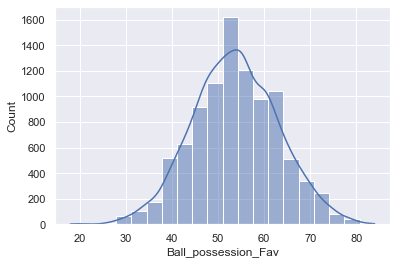

In [ ]:
sns.histplot(df_soccer.Ball_possession_Fav, bins=20, kde=True);

# SECTION I: HYPOTHESYS TESTING

### The null hypothesis for a chi-square independence test is that two categorical variables are independent in some population.
### H1: It is believed that the team that has more possession of the ball will win more matches. Thus the variables are not independent


#### We can already tell just by looking to the output below that the favourite team has more possession of the ball in this population

In [ ]:
df_soccer.FAV_more_possession.describe()

count     9604
unique       2
top        YES
freq      6448
Name: FAV_more_possession, dtype: object

#### Also, the most frequent data point is WON

In [ ]:
df_soccer.WON_LOST_Back.describe()

count     9604
unique       3
top        Won
freq      4709
Name: WON_LOST_Back, dtype: object

In [ ]:
contingency_table = pd.crosstab(df_soccer['FAV_more_possession'], df_soccer['WON_LOST_Back'], margins=True)
contingency_table

WON_LOST_Back,Draw,Lost,Won,All
FAV_more_possession,,,,
NO,823,726,1607,3156
YES,1607,1739,3102,6448
All,2430,2465,4709,9604


In [ ]:
observed_values= np.append(contingency_table.iloc[0][0:3].values,
                           contingency_table.iloc[1][0:3].values)
observed_values

array([ 823,  726, 1607, 1607, 1739, 3102], dtype=int64)

In [ ]:
overall_total=contingency_table.loc['All','All']
overall_total

9604

In [ ]:
row_total = contingency_table.iloc[:2,3].values

column_total= contingency_table.iloc[2,:3].values

print('The total of observation per row NO or YES is', row_total )
print('The total of observation per columns Draw, Lost and Win are', column_total)


The total of observation per row NO or YES is [3156 6448]
The total of observation per columns Draw, Lost and Win are [2430 2465 4709]


In [ ]:
expected_value= []
for i in range (2):
    for j in range(3):
        expected_value.append(row_total[i]*column_total[j]/overall_total)
        
expected_value

[798.5297792586422,
 810.0312369845898,
 1547.438983756768,
 1631.4702207413577,
 1654.9687630154103,
 3161.561016243232]

## DOF = (No. of rows — 1)(No. of columns — 1) = (2–1)(3–1) = 2

In [ ]:
from scipy.stats import chi2
from scipy import stats

In [ ]:
dof = 2
chi_square_value = np.sum((observed_values-expected_value)**2/expected_value)
print ('Chi_square Statistic is', chi_square_value)
print ('Chi_square critical at 0.05 alpha and at a 2 degrees of freedom is ', chi2.ppf(0.95, dof))

Chi_square Statistic is 17.515428472538
Chi_square critical at 0.05 alpha and at a 2 degrees of freedom is  5.991464547107979


In [ ]:
p_value = 1 - stats.chi2.cdf(chi_square_value, dof)
p_value

0.000157243619886005

## The code below is just a simplified way to find the values shown above. It tell us everything we need to know about our test. 
## To interpret the output just follow the order above:

1. The Chi Square value 
2. The p-value
3. The degree of freedom
4. An array with the expected values 

In [ ]:
data = [[823,  726, 1607],
        [1607, 1739, 3102]]

import scipy.stats as stats

#perform the Chi-Square Test of Independence
stats.chi2_contingency(data)

(17.515428472538,
 0.00015724361988597404,
 2,
 array([[ 798.52977926,  810.03123698, 1547.43898376],
        [1631.47022074, 1654.96876302, 3161.56101624]]))

### Since this is a small chance, we no longer believe our null hypothesis of our variables being independent in our population.
### Conclusion: Teams having more possession of the ball and the fact that they win more matches than they lose or draw are related in our population. Thus we can reject the null hypothesis.

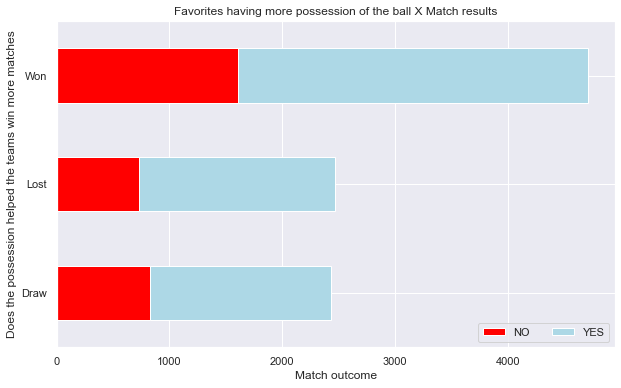

In [ ]:
causation_table = pd.crosstab(df_soccer['WON_LOST_Back'], df_soccer['FAV_more_possession'], margins=False)

causation_table.plot(kind='barh', 
                    stacked=True, 
                    color=['red','lightblue'], 
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Match outcome")
plt.ylabel("Does the possession helped the teams win more matches")
plt.title("Favorites having more possession of the ball X Match results")
plt.show()


# SECTION II: CORRELATION

#### For this study I will drop the lines where the odds of the favorite are bigger than @4 since any number over that defeats the purpose of having a favorite, since the bigger the odd, the less favorite a team is. It is important to take into consideration that the favorite in this case can be the team playing home or away.


In [ ]:
df_soccer.drop(df_soccer.loc[df_soccer['FAVORITE_odd']>=4].index, inplace=True)

In [ ]:
df_soccer.describe()

,FAVORITE_odd,Home_odd,Away_odd,Ball_possession_h,Ball_possession_a,Ball_possession_Fav
count,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000
mean,2.100737,2.662676,4.438480,0.514774,0.485229,54.052865
std,0.635133,1.869909,3.885933,0.099466,0.099467,9.202738
min,1.030000,1.030000,1.070000,0.180000,0.160000,19.000000
25%,1.620000,1.700000,2.500000,0.450000,0.420000,48.000000
50%,2.020000,2.220000,3.300000,0.520000,0.480000,54.000000
75%,2.500000,2.870000,4.850000,0.580000,0.550000,60.000000
max,3.900000,27.000000,51.000000,0.840000,0.820000,84.000000


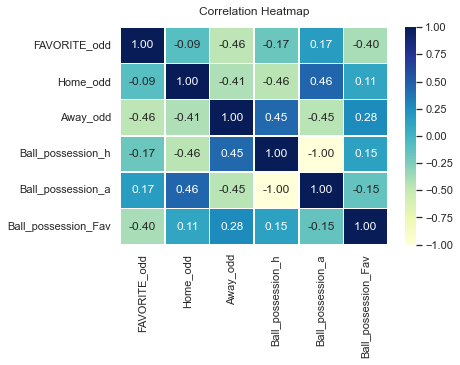

In [ ]:
correlation = df_soccer.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".2f",linewidths=.5, vmin=-1, vmax=1, cmap= "YlGnBu")
plot.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

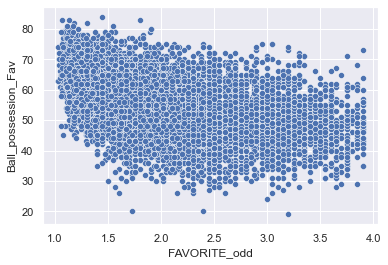

In [ ]:
sns.scatterplot(data=df_soccer, x="FAVORITE_odd", y="Ball_possession_Fav");

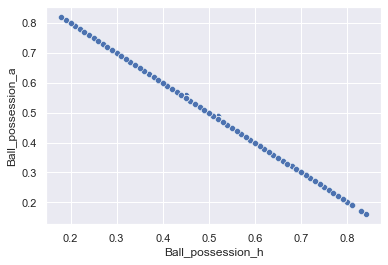

In [ ]:
sns.scatterplot(data=df_soccer, x="Ball_possession_h", y="Ball_possession_a");

# SECTION III: LINEAR REGRESSION

### Forecast the ball possession of the favorite team according to the odd it has before the match start.

1. y = dependent variable = Ball possession
2. x = independent variable = odd

In [ ]:
df_soccer.head()

,Home_team,Away_team,FAVORITE,RESULTS,FAVORITE_odd,Home_odd,Away_odd,Ball_possession_h,Ball_possession_a,WON_LOST_Back,Ball_possession_Fav,FAV_more_possession
1,Houston Dynamo,Atlanta Utd,HOME,HOME,2.55,2.55,2.65,0.41,0.59,Won,41.0,NO
2,Philadelphia Union,New England Revolution,HOME,HOME,1.93,1.93,3.90,0.64,0.36,Won,64.0,YES
3,Orlando City,DC United,HOME,DRAW,2.25,2.25,3.05,0.59,0.41,Draw,59.0,YES
4,FC Dallas,Real Salt Lake,HOME,DRAW,1.70,1.70,4.75,0.53,0.47,Draw,53.0,YES
5,San Jose Earthquakes,Minnesota United,HOME,HOME,1.57,1.57,5.50,0.44,0.56,Won,44.0,NO


#### For this study I will drop the lines where the odds of the favorite are equal or bigger than @2.7 since any number over that defeats the purpose of having a favorite, since the bigger the odd, the less favorite a team is. It is important to take into consideration that this study is focused on the team playing at home.


In [ ]:
df_soccer.drop(df_soccer.loc[df_soccer['Home_odd']>=2.7].index, inplace=True)

In [ ]:
data = [df_soccer["Home_odd"], df_soccer["Ball_possession_h"]]

headers = ["Home_odd", "Ball_possession_h"]

df = pd.concat(data, axis=1, keys=headers)
df.head()

,Home_odd,Ball_possession_h
1,2.55,0.41
2,1.93,0.64
3,2.25,0.59
4,1.70,0.53
5,1.57,0.44


### Visuzalize relationship between variables using scatterplot

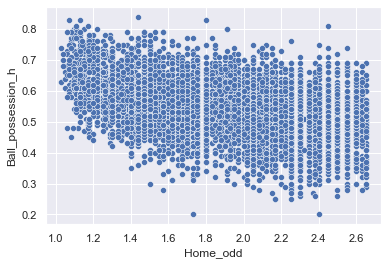

In [ ]:
sns.scatterplot(data=df, x="Home_odd", y="Ball_possession_h");

#### We can make sure if there is a correlation doing the code below. It seems that the variables have a negative moderated correlation due to the coefficient found of -0.416852


In [ ]:
df.corr(method='pearson')

,Home_odd,Ball_possession_h
Home_odd,1.000000,-0.416852
Ball_possession_h,-0.416852,1.000000


In [ ]:
ball_possesion_fit = np.polyfit(df.Home_odd, df.Ball_possession_h, 1)

ball_possesion_fit

array([-0.0907896 ,  0.71391881])

* Ball_possession: B
* Odds: O

Linear Regression Model: **B = -0.091*O - 0.71**

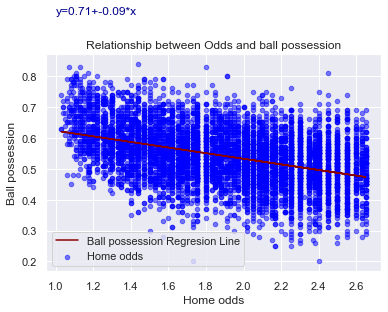

In [ ]:
#### Scatter plots.
ax1 = df.plot(kind='scatter', x='Home_odd', y='Ball_possession_h', color='blue', alpha=0.5)

#### regression lines
plt.plot(df.Home_odd, ball_possesion_fit[0] * df.Home_odd + ball_possesion_fit[1], color='darkred')

#### regression equations
plt.text(1, 1,'y={:.2f}+{:.2f}*x'.format( ball_possesion_fit[1],  ball_possesion_fit[0]), color='darkblue')

#### legend, title and labels.

plt.legend(labels=['Ball possession Regresion Line', 'Home odds', 'Ball possession'])
plt.title('Relationship between Odds and ball possession')
plt.xlabel('Home odds')
plt.ylabel('Ball possession');

### The code below is going to give us the same result we achieved using numpy

In [ ]:
from sklearn.linear_model import LinearRegression


# create linear regression object
lr_ball_possession = LinearRegression()

# fit linear regression
lr_ball_possession.fit(df[['Home_odd']], df['Ball_possession_h'])

# get the slope and intercept of the line best fit
print(lr_ball_possession.intercept_)

print(lr_ball_possession.coef_)

0.7139188147296436
[-0.0907896]


### Let´s use the code below to make prediction using numpy

In [ ]:
df['predicted_possession'] = np.polyval(ball_possesion_fit,df[['Home_odd']])

df.head()

,Home_odd,Ball_possession_h,predicted_possession
1,2.55,0.41,0.482405
2,1.93,0.64,0.538695
3,2.25,0.59,0.509642
4,1.70,0.53,0.559576
5,1.57,0.44,0.571379


In [ ]:
actual_possession = df['Ball_possession_h']
predicted_possession = df['predicted_possession']
R_square = r2_score(actual_possession,predicted_possession) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.17376551475988433
